# Black-Litterman Model

reference: _Notes on BLCOP Packages_ by Francisco @ Mango Solutions

In [26]:
options(warn = -1)
#install.packages("BLCOP", repos = "http://cran.us.r-project.org")
#install.packages("DEoptimR", repos = "http://cran.us.r-project.org")  # need DEoptimR package
library(BLCOP)

## Introduction to Black-Litterman Model

BL model is based on the objects that represent views on the market and posterior market distribution after blending the views. 

__A Simple Example:__

Suppose that an investor, Franklin Ma, has a view that the average of 2 tech companies(IBM and Dell) will outperform 6% one(MS) of the 4 financial companies, with variance 0.01:   
$1/2 * (IBM + DELL) - MS$ ~ $N(0.06, 0.01)$

In [27]:
library(fPortfolio)
library(mnormt)

In [28]:
pickMatrix <- matrix(c(1/2, -1, 1/2, rep(0, 3)), nrow = 1, ncol = 6 )
views <- BLViews(P = pickMatrix, q = 0.06,confidences = 100, assetNames = colnames(monthlyReturns))
views

1 : 0.5*IBM+-1*MS+0.5*DELL=0.06  + eps. Confidence: 100  

In [29]:
colnames(monthlyReturns) # C for Citi, BAC for Bank of America

[1] "IBM"  "MS"   "DELL" "C"    "JPM"  "BAC"

Next, we need to calculate prior distribution of these assets. Franklin will set their mean to 0, 

In [30]:
priorMeans <- rep(0, 6)
priorVarcov <- cov.mve(monthlyReturns)$cov

In [31]:
priorVarcov

,IBM,MS,DELL,C,JPM,BAC
IBM,0.009508273,0.006851003,0.007363100,0.006275786,0.004991600,0.002129753
MS,0.006851003,0.012091647,0.008035352,0.006596437,0.007557539,0.003057471
DELL,0.007363100,0.008035352,0.031808703,0.004337031,0.006457741,0.002367867
C,0.006275786,0.006596437,0.004337031,0.006758956,0.005161035,0.003213143
JPM,0.004991600,0.007557539,0.006457741,0.005161035,0.009125576,0.003832813
BAC,0.002129753,0.003057471,0.002367867,0.003213143,0.003832813,0.005092258


In [32]:
marketPosterior <- posteriorEst(view = views, sigma = priorVarcov, mu = priorMeans, tau = 1/2)
marketPosterior

Prior means:
 IBM   MS DELL    C  JPM  BAC 
   0    0    0    0    0    0 
Posterior means:
         IBM           MS         DELL            C          JPM          BAC 
 0.003045899 -0.008934759  0.022201149 -0.002479546 -0.003522932 -0.001554315 
Posterior covariance:
             IBM          MS        DELL           C         JPM         BAC
IBM  0.014222186 0.010394494 0.010751469 0.009446423 0.007533922 0.003215156
MS   0.010394494 0.017791363 0.012913039 0.009798605 0.011199840 0.004525996
DELL 0.010751469 0.012913039 0.045576092 0.006744214 0.010025710 0.003701410
C    0.009446423 0.009798605 0.006744214 0.010111779 0.007703680 0.004803005
JPM  0.007533922 0.011199840 0.010025710 0.007703680 0.013634554 0.005725479
BAC  0.003215156 0.004525996 0.003701410 0.004803005 0.005725479 0.007627913

In [33]:
finViews <- matrix(nrow = 1, ncol = 4, dimnames = list(NULL, c("C", "JPM", "BAC", "MS")))
finViews[, 1:4] <- rep(0.25, 4)
views <- addBLViews(finViews, 0.15, confidences = 90, views)
views

1 : 0.5*IBM+-1*MS+0.5*DELL=0.06  + eps. Confidence: 100  
2 : 0.25*MS+0.25*C+0.25*JPM+0.25*BAC=0.15  + eps. Confidence: 90  

In [34]:
marketPosterior <- BLPosterior(as.matrix(monthlyReturns), views, tau = 1/2, marketIndex = as.matrix(sp500Returns), 
                               riskFree = as.matrix(US13wTB))
marketPosterior

Prior means:
        IBM          MS        DELL           C         JPM         BAC 
0.020883598 0.059548398 0.017010062 0.014492325 0.027365230 0.002829908 
Posterior means:
       IBM         MS       DELL          C        JPM        BAC 
0.06344562 0.07195806 0.07777653 0.04030821 0.06884519 0.02592776 
Posterior covariance:
             IBM          MS        DELL           C         JPM         BAC
IBM  0.021334221 0.010575532 0.012465444 0.008518356 0.010605748 0.005281807
MS   0.010575532 0.031231768 0.017034827 0.012704758 0.014532900 0.008023646
DELL 0.012465444 0.017034827 0.047250599 0.007386821 0.009352949 0.005086150
C    0.008518356 0.012704758 0.007386821 0.016267422 0.010968240 0.006365457
JPM  0.010605748 0.014532900 0.009352949 0.010968240 0.028181136 0.011716834
BAC  0.005281807 0.008023646 0.005086150 0.006365457 0.011716834 0.011199343

In [35]:
# optimize
optPorts <- optimalPortfolios.fPort(marketPosterior, optimizer = "tangencyPortfolio")

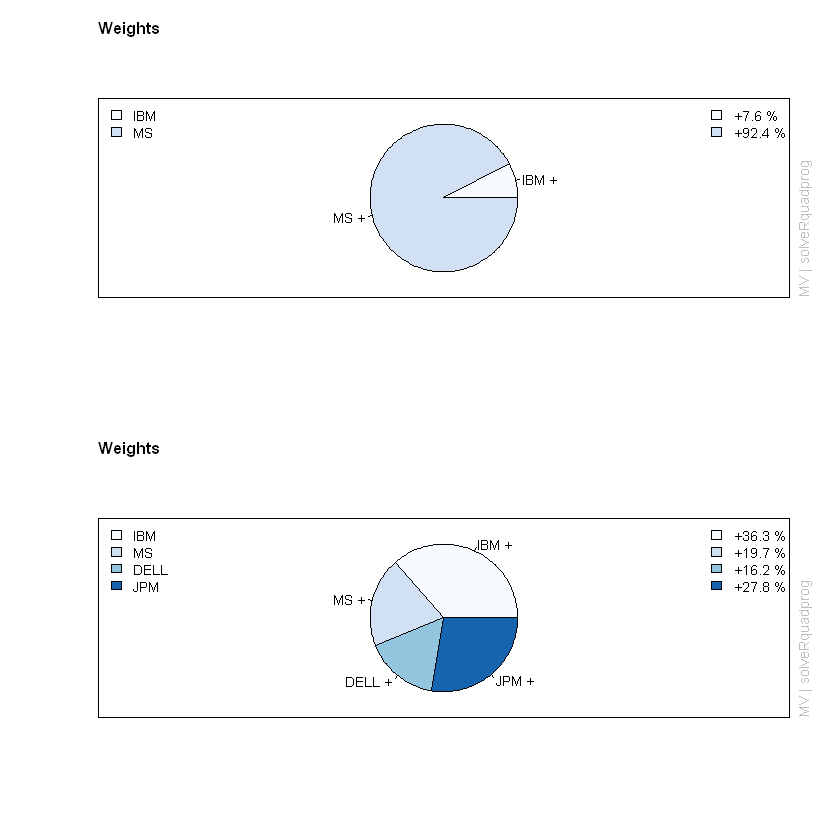

In [36]:
par(mfrow = c(2,1))
weightsPie(optPorts$priorOptimPortfolio)
weightsPie(optPorts$posteriorOptimPortfolio)

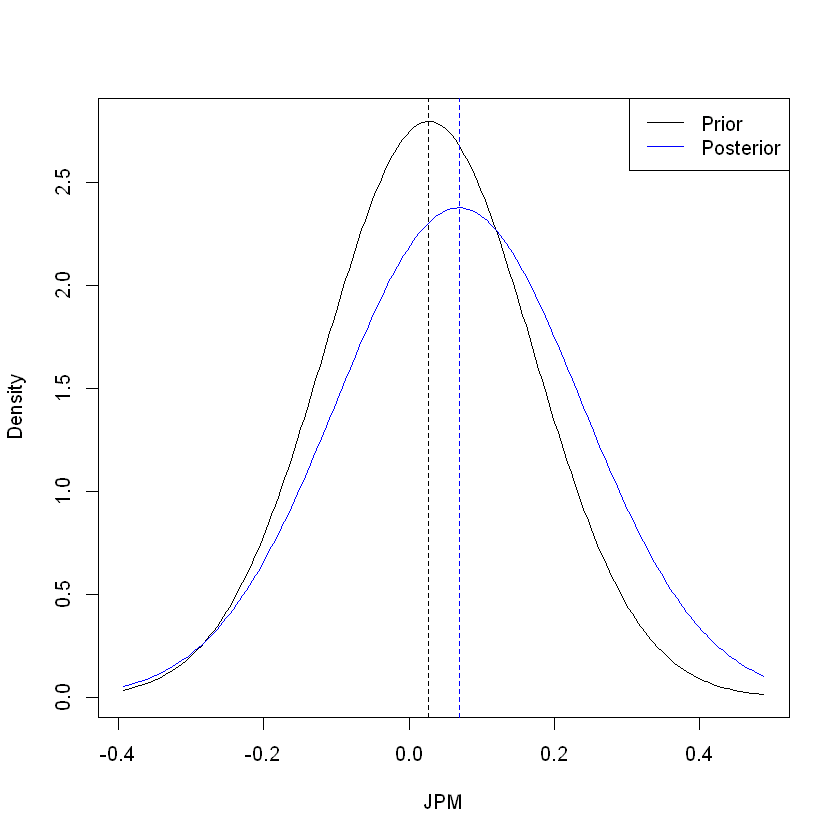

In [37]:
densityPlots(marketPosterior, "JPM")

Written by Franklin Ma, Nov 5, 2016